matplotlib has 3 layers:
- Backend: FigureCanvas, Renderer, Event
- Artist: Types: Primitve & Composite 
- Scripting (pyplot): made it easier for users. Austomates first two layers

PANDAS Inbuilt Graphs in .plot(kind =)

*   `bar` for vertical bar plots
*   `barh` for horizontal bar plots
*   `hist` for histogram
*   `box` for boxplot
*   `kde` or `density` for density plots
*   `area` for area plots
*   `pie` for pie plots
*   `scatter` for scatter plots
*   `hexbin` for hexbin plot

In [1]:
import matplotlib.pyplot as plt # importing the scripting interface
import matplotlib as mpl
%matplotlib inline
# magic function that dynamically renders and changes plot
import numpy as np
import pandas as pd

In [2]:
# applying default styles
# print(plt.style.available)
mpl.style.use(['ggplot'])

# Dataset

In [8]:
df = pd.read_csv("Canada_immigration.csv", index_col="Country") # reading the info and creating a df
df = df.iloc[:,1:] # removing first unnamed column
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [4]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))

## Line Plot
 - series of data sets

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.

In [5]:
haiti = df.loc["Haiti", years] # extracting only Haiti immigration numbers over the years

In [6]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting

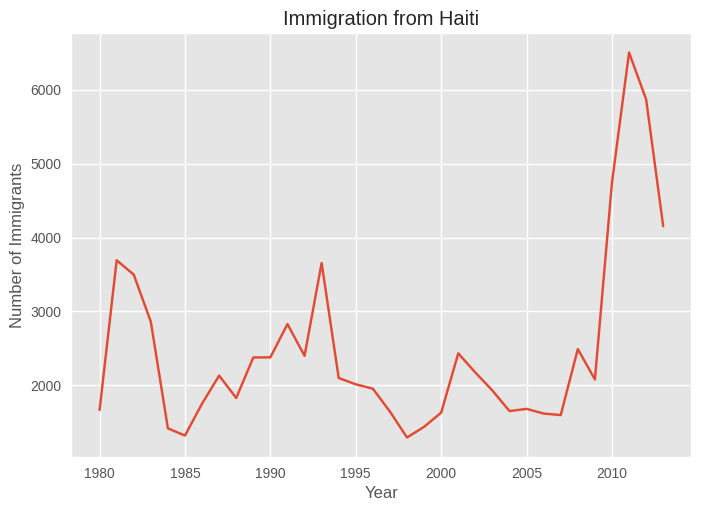

In [56]:
haiti.plot(kind = "line")

plt.title("Immigration from Haiti")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.show()

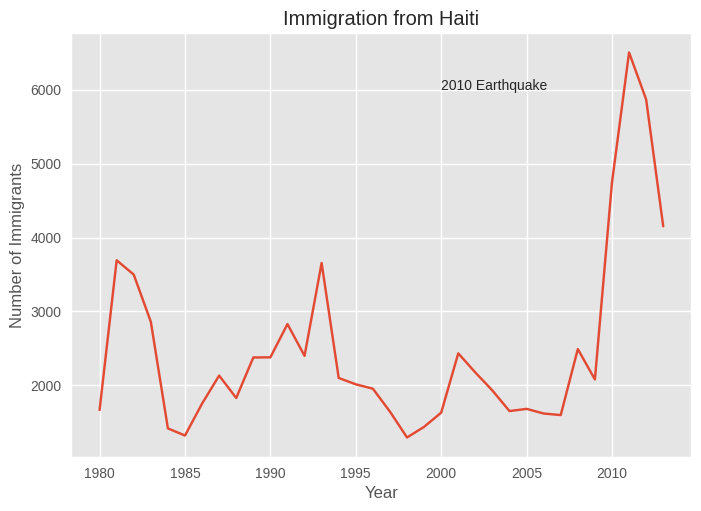

In [60]:
# syntax: plt.text(x, y, label)
haiti.plot(kind = "line")

plt.title("Immigration from Haiti")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants") # annotate the 2010 Earthquake. 
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show()

### Area Plot
- Based on Line plot
- Helps to generate and compare areas

In [62]:
#df["Total"] = df.sum(axis = 1)

/tmp/ipykernel_15648/1890078647.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["Total"] = df.sum(axis = 1)


In [6]:
df.sort_values(["Total"], ascending= False, axis = 0, inplace=True)

In [7]:
df_5 = df.head(5) # taking the top 5
df_5 = df_5[years] # only taking the year columns
df_5 = df_5.transpose() # in plot the indices become the X axis

Text(0, 0.5, 'Number of total Immigrants')

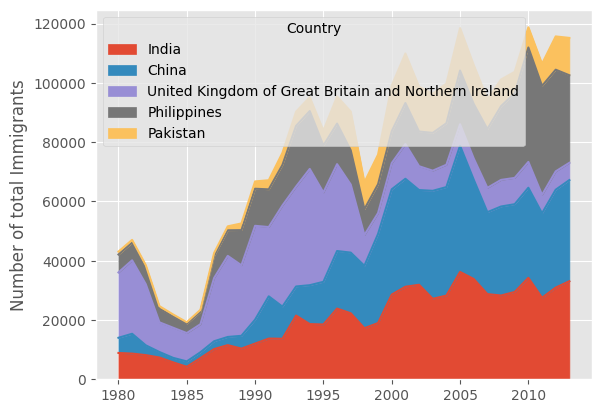

In [8]:
df_5.plot(kind="area")
plt.ylabel("Number of total Immigrants")

Text(0, 0.5, 'Number of total Immigrants')

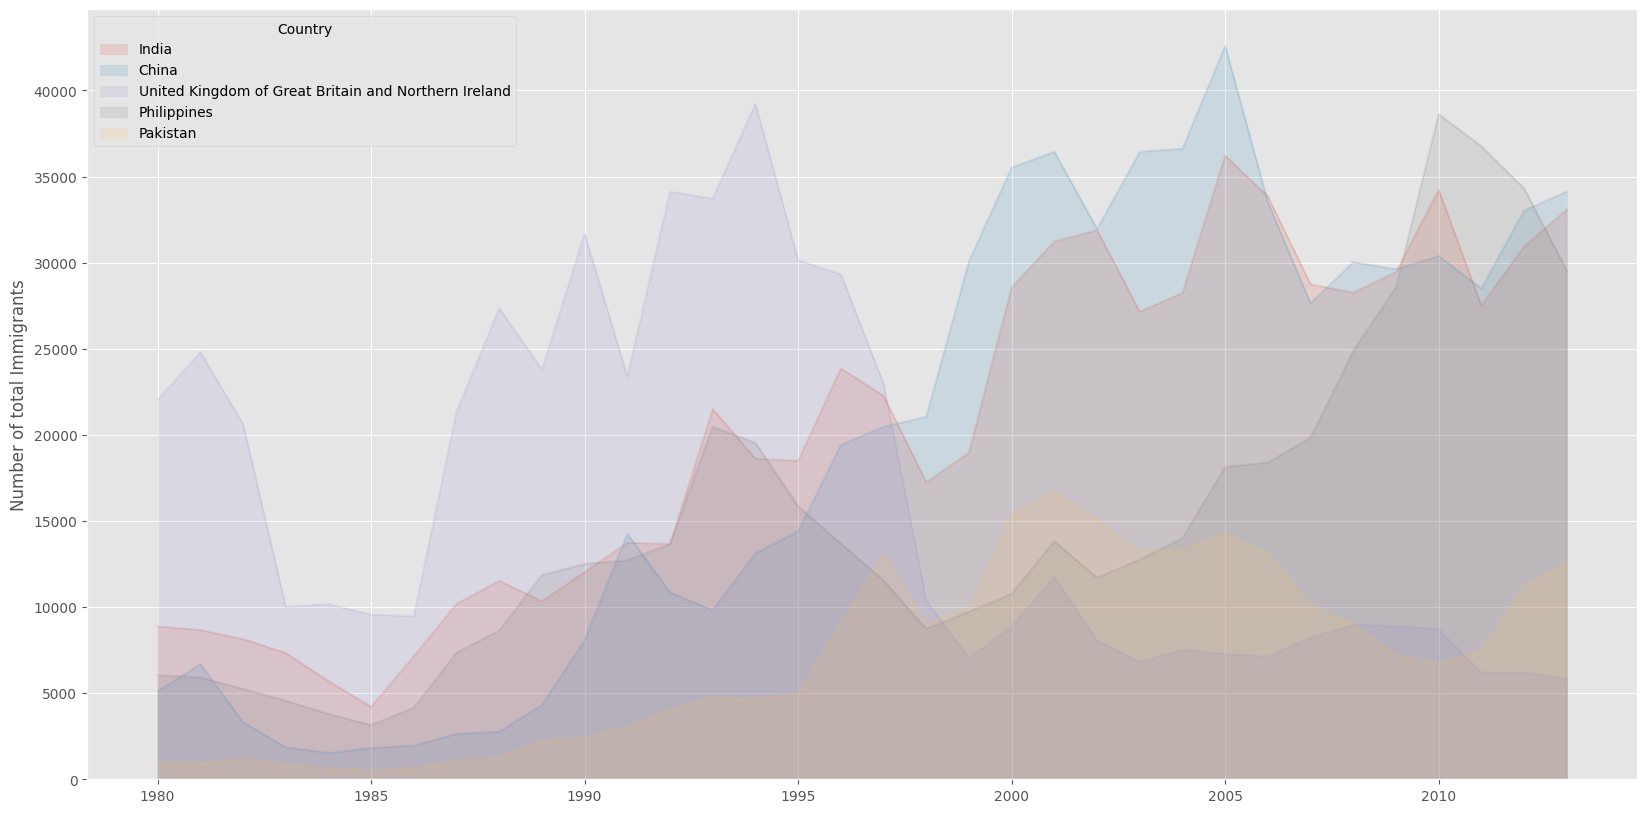

In [13]:
df_5.plot(kind="area", stacked=False, alpha=0.15, figsize=(20, 10)) # unstacked
plt.ylabel("Number of total Immigrants")

Text(0.5, 1.0, 'Immigration of top 5 countries')

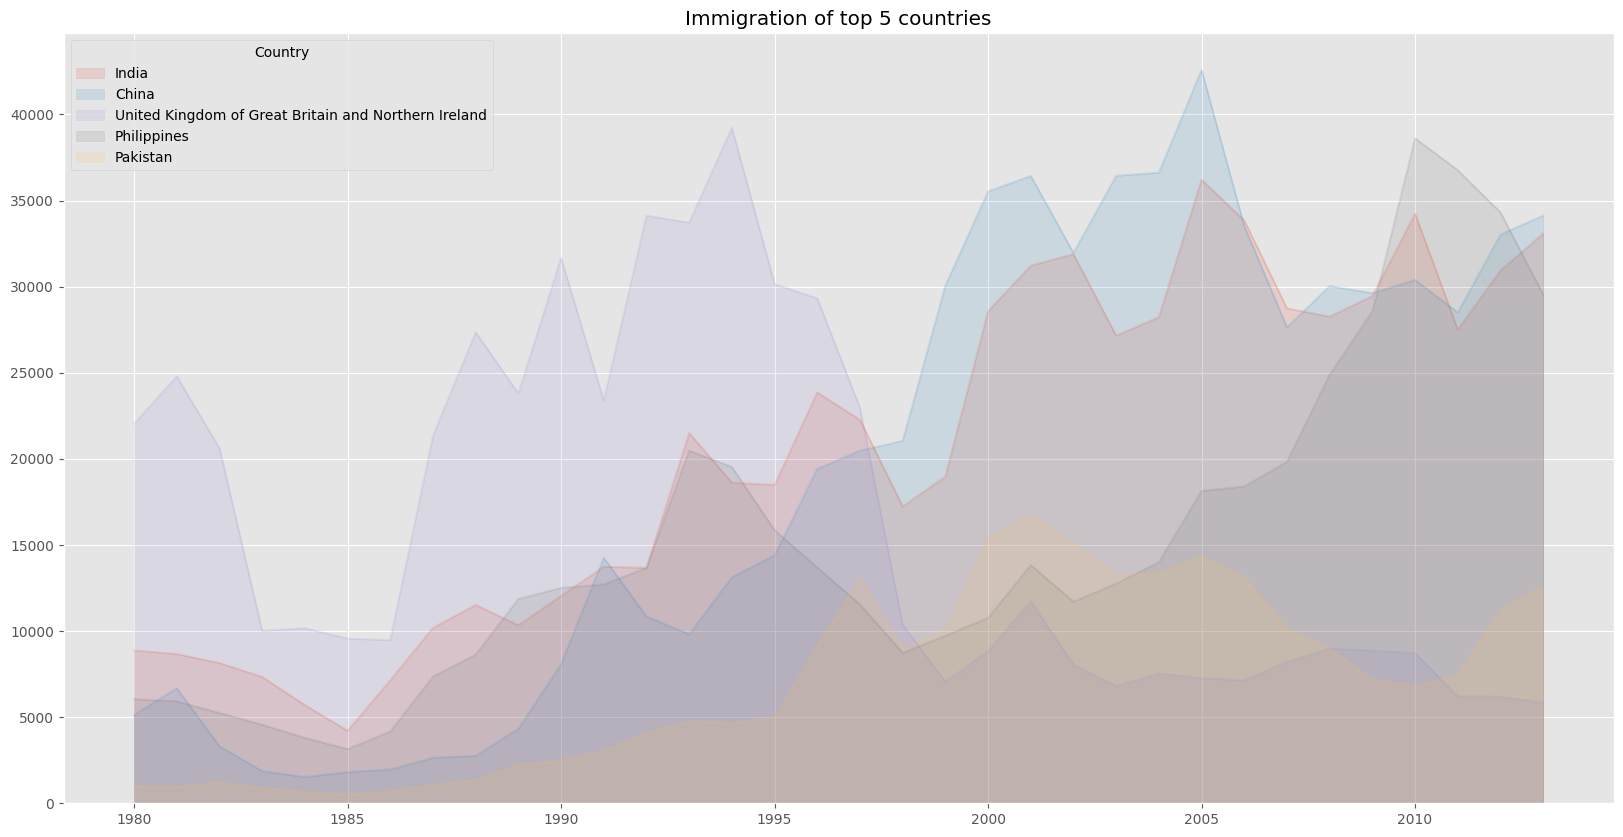

In [15]:
# Using the artist layer by calling the Axes object
ax = df_5.plot(kind="area", stacked=False, alpha=0.15, figsize=(20, 10))

ax.set_title("Immigration of top 5 countries")

### Histogram
- is a frquency distribution
- Y axis = bins
- X Yxis = number of datapoints in bins

In [19]:
df["2013"].describe()

count      195.000000
mean      1320.702564
std       4237.951988
min          0.000000
25%         45.000000
50%        213.000000
75%        796.000000
max      34129.000000
Name: 2013, dtype: float64

<AxesSubplot:ylabel='Frequency'>

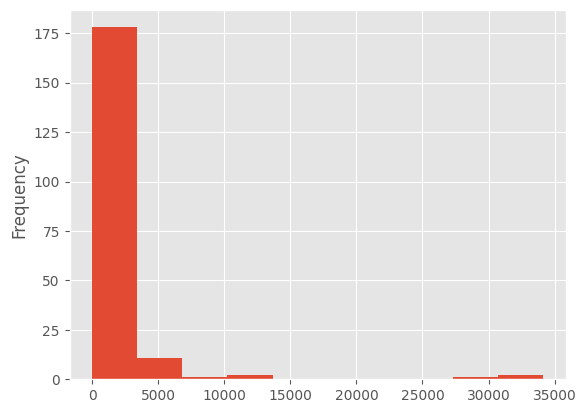

In [8]:
df["2013"].plot(kind="hist") # pandas

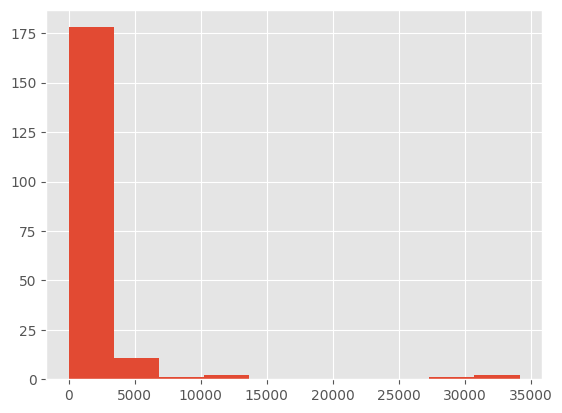

In [21]:
plt.hist(df["2013"], bins=10) # matplotlib
plt.show()

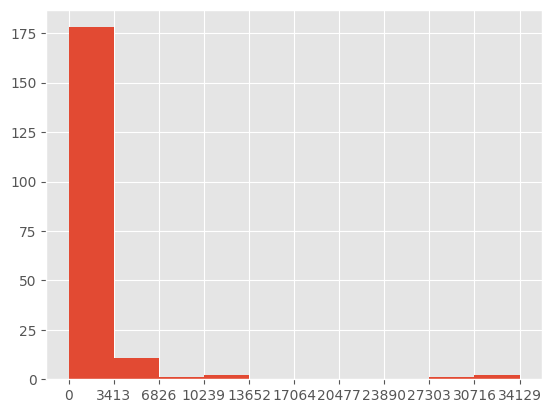

In [20]:
# Using Numpy for Bins
count, bin_edges = np.histogram(df["2013"]) # returns the bin edges and frequency in each bin

plt.hist(df["2013"]) # matplotlib
plt.xticks(bin_edges)
plt.show()

### Bar chart
- shows the value
- 2d

In [23]:
iceland = df.loc["Iceland", years]

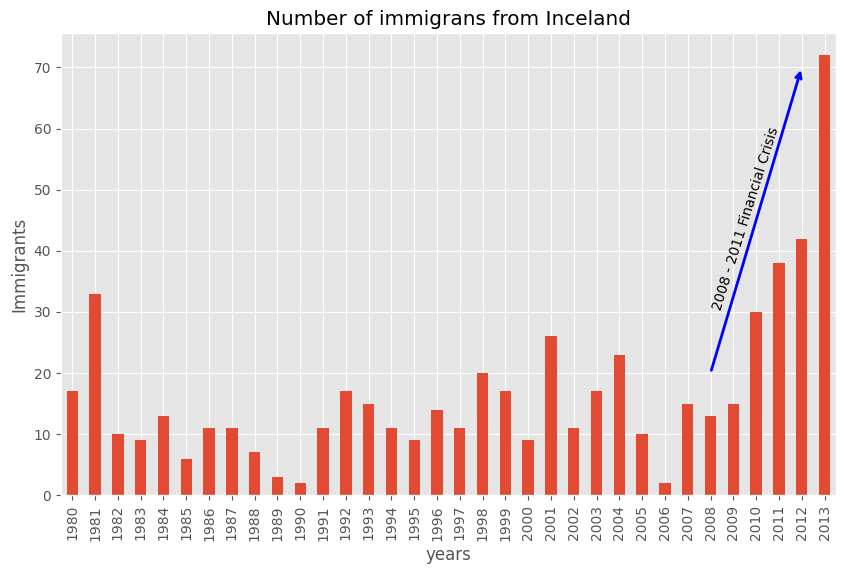

In [28]:
# Pandas
iceland.plot(kind="bar", figsize=(10,6))

plt.xlabel("years")
plt.ylabel("Immigrants")
plt.title("Number of immigrans from Inceland")

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )
# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )
plt.show()

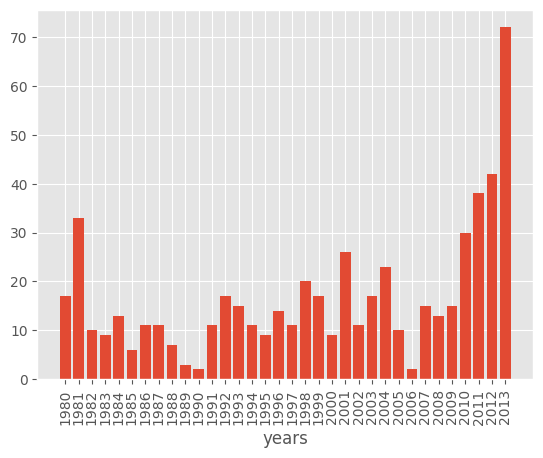

In [21]:
# Matplotlib
plt.bar(iceland.index, iceland.values)
plt.xlabel("years")
plt.xticks(iceland.index, rotation='vertical')

plt.show()

### Pie Plot

In [9]:
df_continent = df.groupby("Continent", axis = 0).sum()

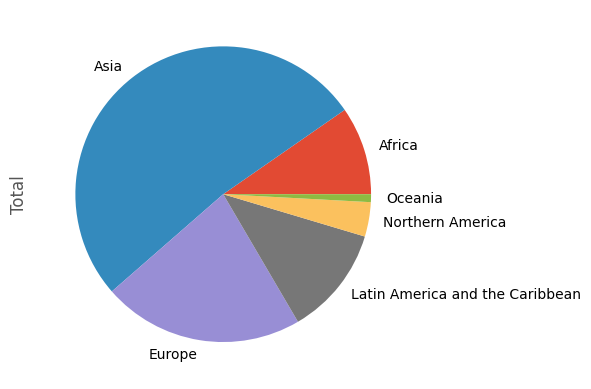

In [13]:
# Pandas
df_continent["Total"].plot(kind="pie")
plt.show()

### Boxplot
A box plot is a way of statistically representing the distribution of the data through five main dimensions:

- Minimum: The smallest number in the dataset excluding the outliers.
- First quartile: Middle number between the minimum and the median.
- Second quartile (Median): Middle number of the (sorted) dataset.
- Third quartile: Middle number between median and maximum.
- Maximum: The largest number in the dataset excluding the outliers.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width="440," align="center">

In [ ]:
df_japan = df.loc[["Japan"], years].T
df_japan.sort_values(["Japan"])

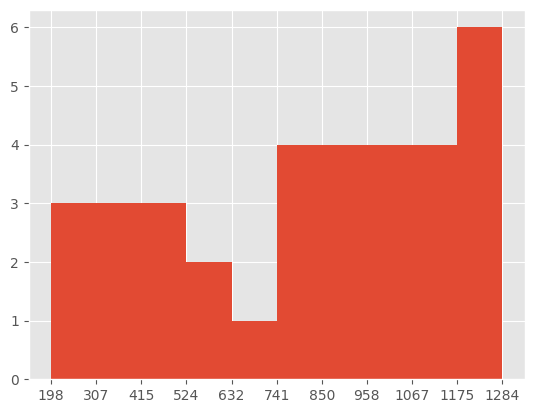

In [21]:
count, bin_edges = np.histogram(df_japan)

plt.hist(df_japan)
plt.xticks(bin_edges)
plt.show()

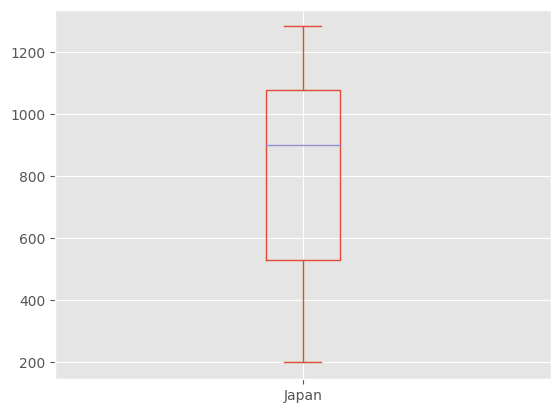

In [26]:
df_japan.plot(kind="box")
plt.show()

#### 2 Box plots using Subplots

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width="500" align="center">

In [72]:
df_CI = df.loc[["China", "India"], years].T
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


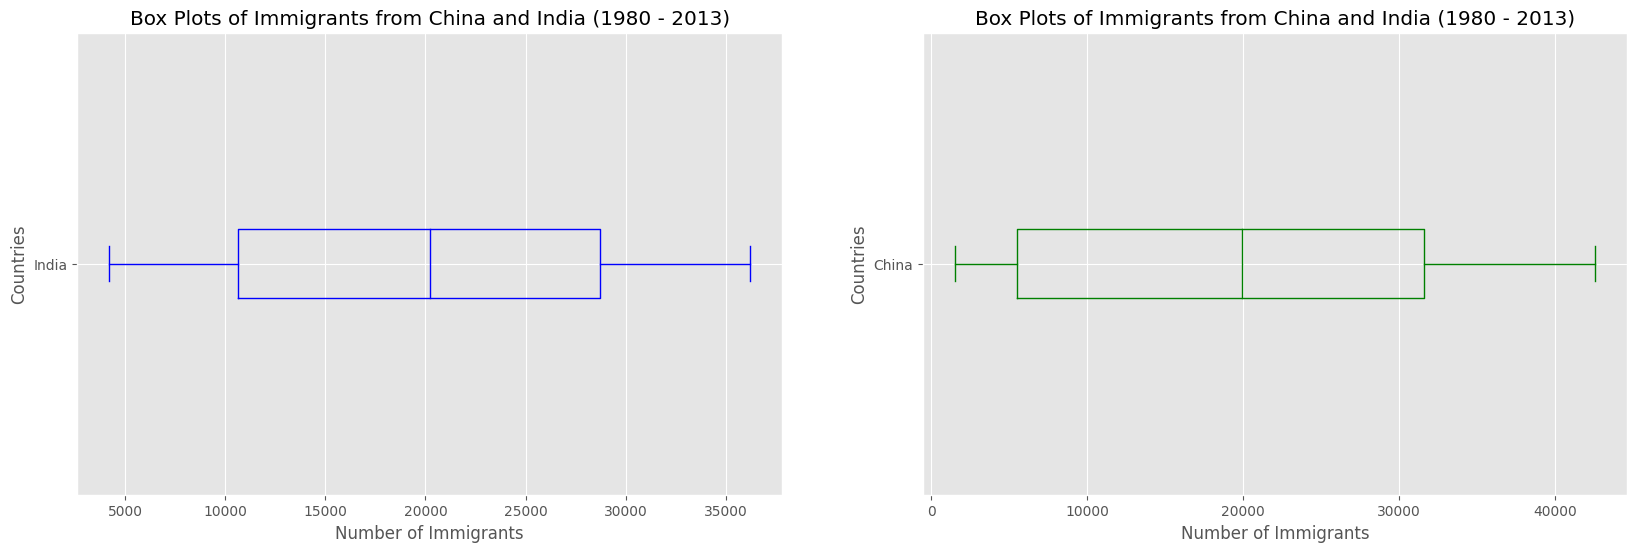

In [73]:
# Sepaated
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.India.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 1: Box plot
df_CI.China.plot(kind='box', color='green', vert=False, figsize=(20, 6), ax=ax1) # add to subplot 1
ax1.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_xlabel('Number of Immigrants')
ax1.set_ylabel('Countries')

plt.show()

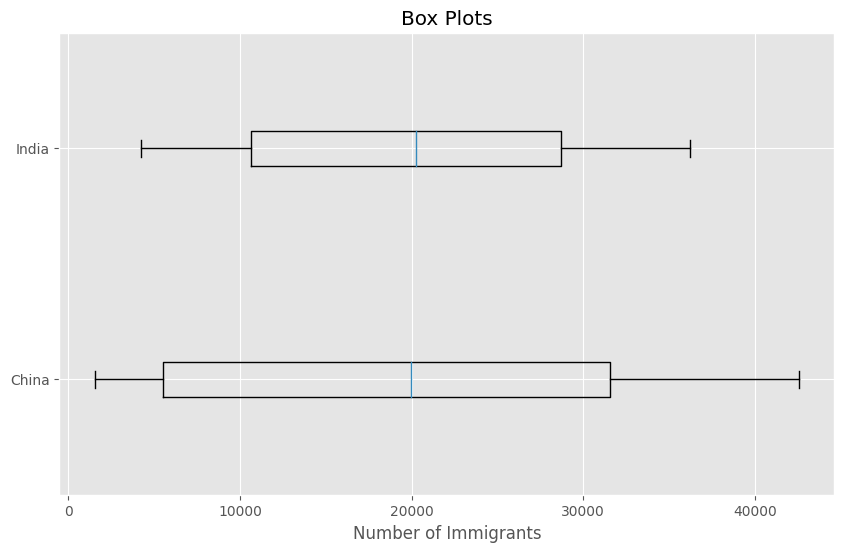

In [82]:
# combined
fig, ax = plt.subplots(figsize=(10, 6)) # one subplot

box1 = ax.boxplot(df_CI.China, positions=[1], vert=False) # first position
box2 = ax.boxplot(df_CI.India, positions=[2], vert=False)

# Set titles and labels
ax.set_title('Box Plots')
ax.set_xlabel('Number of Immigrants')
ax.set_yticklabels(['China', 'India'])

plt.show()

### Scatterplot
 - plotting a dependent vs independent to check correlation

In [90]:
df_total = pd.DataFrame(df[years].sum(), columns= ["Totals"]) # total immigration number per year
df_total["Year"] = df_total.index.values
df_total["Year"] = df_total["Year"].astype(int)


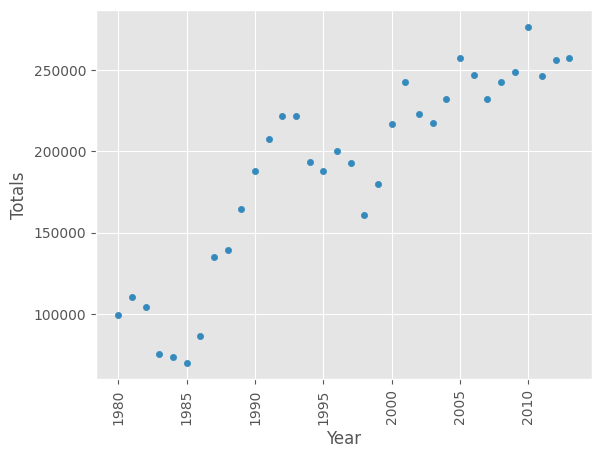

In [91]:
df_total.plot(kind = "scatter", x = "Year", y = "Totals")

plt.xticks(rotation='vertical') # adjusting x axis tickers
plt.show()

In [92]:
x = df_total["Year"]      # year on x-axis
y = df_total["Totals"]     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

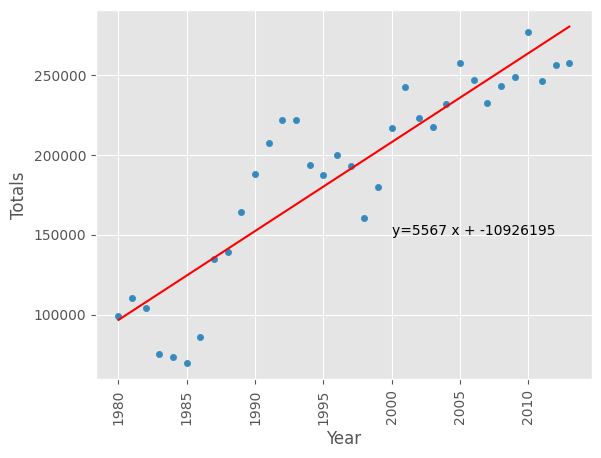

In [93]:
df_total.plot(kind = "scatter", x = "Year", y = "Totals")

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))


plt.xticks(rotation='vertical') # adjusting x axis tickers
plt.show()

#### Scatterplots using Seaborn
- Seaborn is based on Matplotlib
- It makes reg plots easier

In [94]:
import seaborn as sns

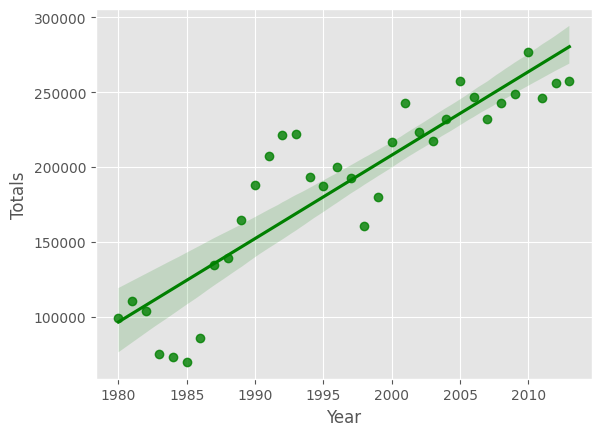

In [96]:
ax = sns.regplot(x="Year", y = "Totals", data=df_total, color = "green")
plt.show()